### Import Libraries

In [2]:
import pandas as pd
import urllib.request, json
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap
import datetime

### Read data from website

In [3]:
with urllib.request.urlopen("https://www.enforcementtracker.com/data.json?") as url:
    jsondata=json.loads(url.read())
   

### Put data into dataframe

In [4]:
# empty list 
data_list = [] 
list_header=['Code','Country','Authority','Date','Fine','Controller','Sector','Quoted Art.','Type','Summary','Link']


for one_data in jsondata['data']: 
    sub_data = [] 
    for i in range(1,12): 
        try:
            if i==2 :
                one_data[i]=one_data[i].rsplit("<br />",1)
                one_data[i]=one_data[i][1]
            if i==11:
                one_data[i]=one_data[i].split("'")
                one_data[i]=one_data[i][3]                
            sub_data.append(one_data[i]) 
        except: 
            continue
    data_list.append(sub_data) 
  
# Storing the data into Pandas 
# DataFrame  
dataFrame = pd.DataFrame(data = data_list, columns = list_header)

# Converting Pandas DataFrame 
# into CSV file 
#dataFrame.to_csv('Geeks.csv')

### GDPR counter

501
257 707 516€
[501, '257 707 516€']


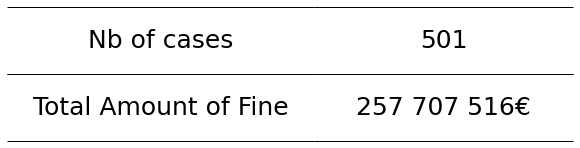

In [25]:



counter_list=[]
nb_of_cases=dataFrame.Code.count()
print(nb_of_cases)

amt_fine=0
for c in dataFrame['Fine']:
    if(c=="Unknown"):
        c="0"
    amt_fine+=int(c.replace(',',''))

str_amt= str(amt_fine) 
result = ''

while str_amt:
    result += str_amt[:3]
    if len(str_amt) > 3:
        result += ' '
    str_amt = str_amt[3:]
result=result+"€"
print(result)

counter_list=[nb_of_cases,result]
print(counter_list)

dc=pd.DataFrame(counter_list,index=["Nb of cases","Total Amount of Fine"])

# Plot a background
plt.figure(linewidth=1,
#           edgecolor='steelblue',
#           facecolor='skyblue',
           tight_layout={'pad':0.5},
           figsize=(8,2)
          )
            

# Plot table
the_table=plt.table(dc.values,rowLabels=dc.index,loc='center',rowLoc='center',cellLoc ='center',edges='horizontal')
the_table.set_fontsize(25)
the_table.scale(1, 5)

# Hide axes & Prepare graph
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)

plt.savefig("../report_build/graphs/counter.jpeg")

### Finding Top 10 Countries

    Country  Counts
0     SPAIN     171
1   ROMANIA      45
2     ITALY      36
3   HUNGARY      35
4   GERMANY      27
5   BELGIUM      20
6  BULGARIA      20
7    SWEDEN      17
8    POLAND      14
9    NORWAY      12


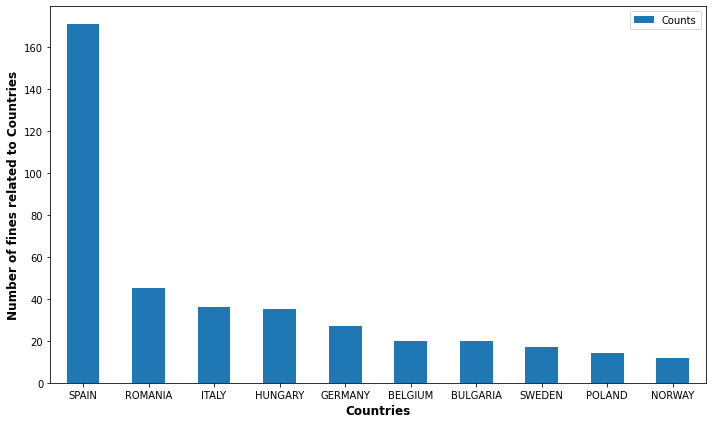

In [12]:
# Finding Top 10 Countries
grouped_data=pd.DataFrame(dataFrame['Country'].value_counts())
grouped_data=grouped_data.reset_index()
grouped_data.columns=['Country', 'Counts']
top10_countries=grouped_data.head(10)
print(top10_countries)

# Exporting the Top 10 Countries Plot
top10_countries.plot(figsize=(10,6), x='Country', y='Counts', kind='bar' , rot=0)
plt.xlabel('Countries', fontsize='large', fontweight='bold')
plt.ylabel('Number of fines related to Countries', fontsize='large', fontweight='bold')
plt.xticks(fontsize='medium')
plt.tight_layout();
plt.savefig("../report_build/graphs/top10_countries.jpeg")



### Finding top 10 countries per sum of fines

            Country  Sum of Fines
2             ITALY      69696601
13           FRANCE      54409000
4           GERMANY      52986633
22   UNITED KINGDOM      44221000
7            SWEDEN      12332430
0             SPAIN       9470810
16  THE NETHERLANDS       3490000
6          BULGARIA       3210690
8            POLAND       1481028
9            NORWAY       1057800


c:\users\corinne\pycharmprojects\gdpr_data_analysis\venv\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


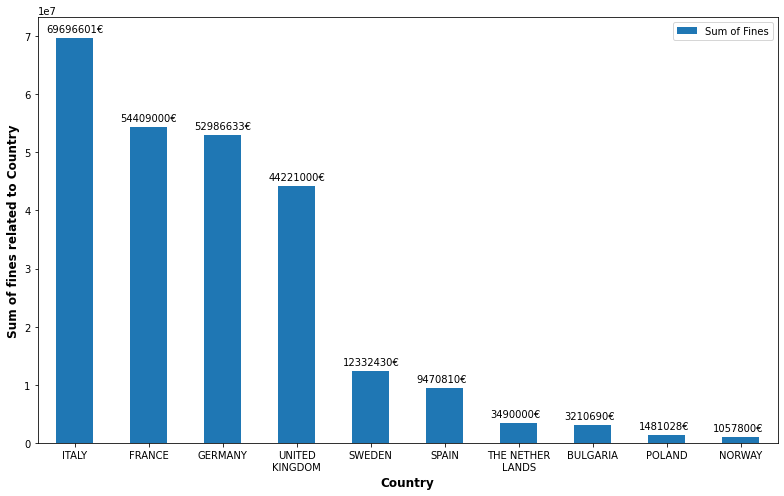

In [13]:
# Finding Top 10 Country / Sum of fines
country_sum_fine=[]
for country in grouped_data['Country']:
    ex=dataFrame.loc[dataFrame['Country']==country,:]
    ex=ex.reset_index()
    ex=ex[["Fine"]]
    ex.columns=['Fine']

    ind=0
    for fine in ex['Fine']:
        if(fine=="Unknown"):
            ex = ex.drop(ind, axis=0)
        ind=ind+1
    sumfine=0
    for fine in ex['Fine']:
        fine=int(str(fine).replace(',',''))
        sumfine=sumfine+fine
    ex.reset_index()
    country_sum_fine.append(sumfine)


sumoffines_per_country={'Country': grouped_data["Country"], 'Sum of Fines': country_sum_fine}
sumoffines_per_country=pd.DataFrame(sumoffines_per_country)
sumoffines_per_country.reset_index()
sumoffines_per_country.columns=['Country', 'Sum of Fines']



# Exporting the Top 10 Country / Sum of fines
sumoffines_per_country=sumoffines_per_country.sort_values("Sum of Fines", ascending=False)
top10_sumoffines_per_country=sumoffines_per_country.head(10)
print(top10_sumoffines_per_country)
top10_sumoffines_per_country.loc[:,'Country']= top10_sumoffines_per_country.loc[:,'Country'].str.wrap(10)
ax=top10_sumoffines_per_country.plot(figsize=(11,7), x='Country', y='Sum of Fines', kind='bar', rot=0)
# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-0.13, i.get_height()+1000000, 
            str(round((i.get_height()), 2))+"€", fontsize=10)
plt.xlabel('Country', fontsize='large', fontweight='bold')
plt.ylabel('Sum of fines related to Country', fontsize='large', fontweight='bold')
plt.tight_layout();
plt.savefig("../report_build/graphs/top10_country_fines.jpeg")

### Finding Top 5 Quoted Articles

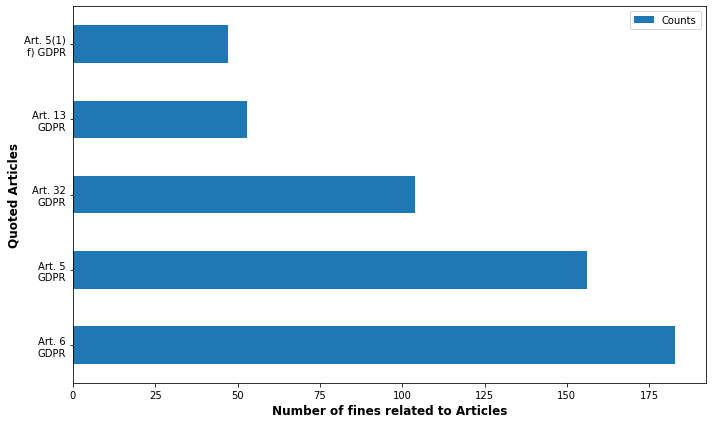

In [14]:
# Finding Top 5 Quoted Articles
qd_list=dataFrame['Quoted Art.'].to_list()
data_header=['Quoted Art.']
qa_list=[]
qa_count=[]
for q in qd_list:
    q=q.replace(",\r\n",", ")
    q=q.replace(",\n",", ")
    q=q.replace(" (","(")
    a=q.rsplit(", ")
    for k in a:
        qa_list.append(k)
qa_ds = pd.Series(qa_list).value_counts()


tuple_list=qa_ds.index.tolist()
indlist=[]
for i in tuple_list:
    indlist.append(''.join(i))
ct_list=qa_ds.tolist()
quoted_data=pd.DataFrame(data = indlist,columns=data_header)
quoted_data['Counts']=ct_list
top10_quotedart=quoted_data.head(5)

# Exporting the Top 10 Quoted Articles Plot
top10_quotedart.loc[:,'Quoted Art.']= top10_quotedart.loc[:,'Quoted Art.'].str.wrap(10)
top10_quotedart.plot(figsize=(10,6), x='Quoted Art.', y='Counts', kind='barh', rot=0)
plt.ylabel('Quoted Articles', fontsize='large', fontweight='bold')
plt.xlabel('Number of fines related to Articles', fontsize='large', fontweight='bold')
plt.tight_layout();
plt.savefig("../report_build/graphs/top10_quotedart.jpeg")


### Finding Top 5 QA / sum of fines

          Quoted Art.  Sum of Fines
10       Art. 14 GDPR        220000
33  Art. 5(1) e) GDPR        160000
25       Art. 37 GDPR        136000
5        Art. 15 GDPR        123458
8        Art. 58 GDPR        100000


c:\users\corinne\pycharmprojects\gdpr_data_analysis\venv\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


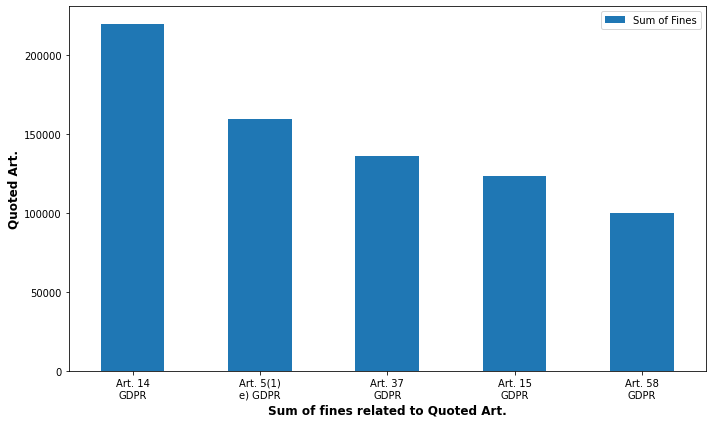

In [15]:
# Finding Top 10 Quoted Articles / Sum of fines
qa_sum_fine=[]
for qa in quoted_data['Quoted Art.']:
    ex=dataFrame.loc[dataFrame['Quoted Art.']==qa,:]
    ex=ex.reset_index()
    ex=ex[["Fine"]]
    ex.columns=['Fine']

    ind=0
    for fine in ex['Fine']:
        if(fine=="Unknown"):
            ex = ex.drop(ind, axis=0)
        ind=ind+1
    sumfine=0
    for fine in ex['Fine']:
        fine=int(str(fine).replace(',',''))
        sumfine=sumfine+fine
    ex.reset_index()
    qa_sum_fine.append(sumfine)

sumoffines_per_qa={'Quoted Art.': quoted_data["Quoted Art."], 'Sum of Fines': qa_sum_fine}
sumoffines_per_qa=pd.DataFrame(sumoffines_per_qa)
sumoffines_per_qa.reset_index()
sumoffines_per_qa.columns=['Quoted Art.', 'Sum of Fines']


# Exporting the Top 10 Quoted Articles / Sum of fines
sumoffines_per_qa=sumoffines_per_qa.sort_values("Sum of Fines", ascending=False)
top10_sumoffines_per_qa=sumoffines_per_qa.head(5)
print(top10_sumoffines_per_qa)
top10_sumoffines_per_qa.loc[:,'Quoted Art.']= top10_sumoffines_per_qa.loc[:,'Quoted Art.'].str.wrap(10)

#Plot
ax=top10_sumoffines_per_qa.plot(figsize=(10,6), x='Quoted Art.', y='Sum of Fines', kind='bar', rot=0)
# set individual bar labels using above list
#for i in ax.patches:
#    # get_x pulls left or right; get_height pushes up or down
#    ax.text(i.get_x()-0.13, i.get_height()+1000000, 
#            str(round((i.get_height()), 2))+"€", fontsize=10)
plt.ylabel('Quoted Art.', fontsize='large', fontweight='bold')
plt.xlabel('Sum of fines related to Quoted Art.', fontsize='large', fontweight='bold')
plt.tight_layout();
plt.savefig("../report_build/graphs/top10_quoted_articles_fines.jpeg")

### Number of fines according to the month

In [16]:
# General Definition for all date related statistic
date_list=[]
date_header=['Year','Month','Day']
month=['','Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']

# Parse date into columns
for d in dataFrame['Date']:
    date_list.append(d.split('-'))
ds = pd.DataFrame(data = date_list, columns = date_header) 


# Get min & max of year & month
da = ds.sort_values(['Year','Month'],na_position='first').dropna().reset_index().drop(columns='index')
minyear=da['Year'][0]
minmonth=da['Month'][0]
maxyear=da['Year'][len(da)-1]
maxmonth=da['Month'][len(da)-1]



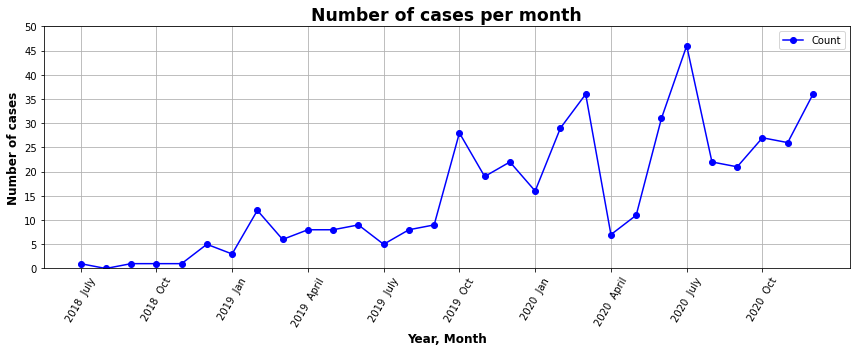

In [17]:
# Build xticks list & count for each ayear and month
xtlist=[]
count=[]
for y in range(int(minyear),int(maxyear)+1):
    for m in range(1,13):
        if(((y==int(minyear)) & (m<int(minmonth))) |((y==int(maxyear)) & (m>int(maxmonth)))):
            continue
        else:
            xtlist.append(str(y)+"  "+month[m])
            if(m<10):
                count.append(len(da[(da['Year']==str(y)) & (da['Month']=='0'+str(m))]))
            else:
                count.append(len(da[(da['Year']==str(y)) & (da['Month']==str(m))]))


# Prepare data frame for the graph
dc=pd.DataFrame(data = xtlist, columns =['Year,Month'])
dc['Count']=count

# Plot graph
dc.plot(figsize=(12,5),fontsize=10,color='blue', marker='o',legend=True,rot=60,ylim=(0,dc['Count'].max()))

# Prepare Graph
plt.xlabel("Year, Month", fontsize='large', fontweight='bold')
plt.ylabel("Number of cases", fontsize='large', fontweight='bold')
plt.xticks(range(0,len(xtlist)), xtlist)
plt.yticks(list(range(0, dc['Count'].max()+5,5)))
plt.title("Number of cases per month", fontsize= 'xx-large', fontweight='bold')

# To specify the number of ticks on both or any single axes
plt.locator_params(axis='x', nbins=(int(maxyear)-int(minyear))*6)
plt.tight_layout()
plt.grid()
#plt.show()
plt.savefig("../report_build/graphs/NbFinesPerMonthGraph.jpeg")

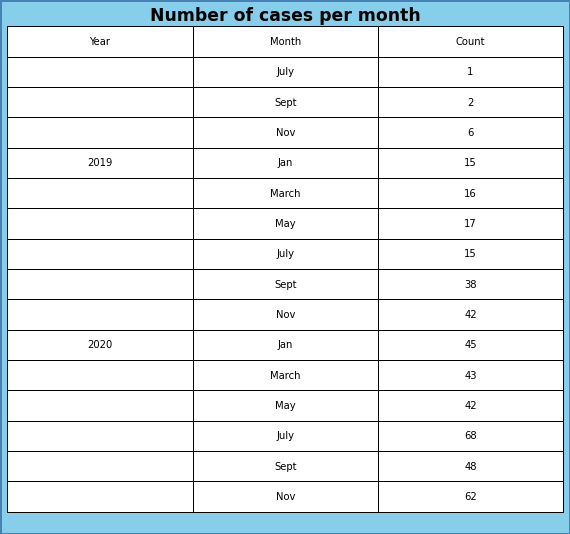

In [18]:
MaxNbElmtTable=30

# Prepare data frame for the graph, Add in count
dc=pd.DataFrame({'Count' : ds.groupby(['Year','Month'],dropna=True).size()}).reset_index()
for y in range(int(minyear),int(maxyear)+1):
    for m in range(1,13):
        if(((y==int(minyear)) & (m<int(minmonth))) |((y==int(maxyear)) & (m>int(maxmonth)))):
            continue
        else:
            if(m<10):
                if (dc[(dc['Year']==str(y)) & (dc['Month']==('0'+str(m)))].empty):
                    dc=dc.append({'Year':str(y), 'Month':('0'+str(m)), 'Count':0},ignore_index=True)
            else:
                if (dc[(dc['Year']==str(y)) & (dc['Month']==str(m))].empty):
                    dc=dc.append({'Year':str(y), 'Month':str(m), 'Count':0},ignore_index=True)                    
dc=dc.sort_values(by=['Year','Month']).reset_index()
dc=dc.drop(columns='index')  


# Beautify the table
a=dc['Year'][0]
for i in range(len(dc['Month'])):
    dc.loc[i,['Month']]=month[int(dc.loc[i,['Month']])]
    if(i!=1):
        if(dc['Year'][i] ==str(a)):
            dc.loc[i,['Year']]="  "
        else:
            a=dc['Year'][i]

        
while(len(dc)>=MaxNbElmtTable):
    for i in range(0,len(dc)):
        if((i%2==0) & ((i+1)<len(dc)) ):
            dc.loc[i,['Count']]=str(int(dc.loc[i,['Count']])+int(dc.loc[(i+1),['Count']]))
    dc=dc.iloc[::2].reset_index() 
    dc=dc.drop(columns='index') 
    

        
# Plot a background
plt.figure(linewidth=3,
           edgecolor='steelblue',
           facecolor='skyblue',
           tight_layout={'pad':1},
           figsize=(8,len(dc)/2)
          )
    
# Plot table
the_table=plt.table(dc.values,colLabels=dc.columns,loc='center',rowLoc='center',cellLoc ='center')
the_table.scale(1, 2)

# Hide axes & Prepare graph
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)

# Add title
plt.title('Number of cases per month',y=0.97, fontsize= 'xx-large', fontweight='bold')

# Add footer
# plt.figtext(0.95, 0.02, datetime.datetime.now(), horizontalalignment='right', size=8, weight='light')

plt.savefig("../report_build/graphs/NbFinesPerMonthTable.jpeg")

### Accumulation of the sum of fines every year

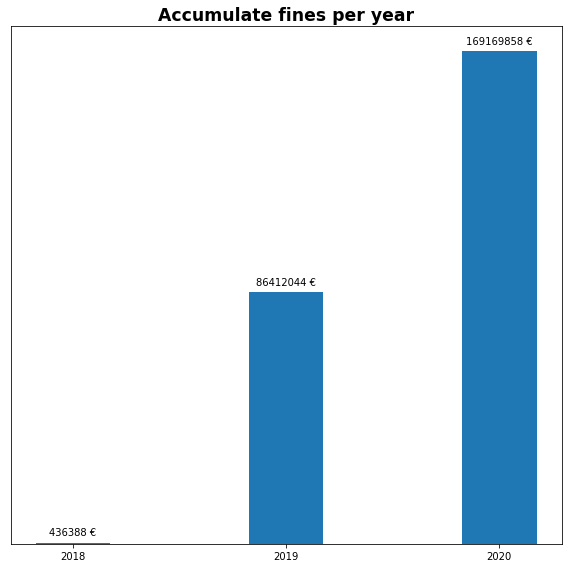

In [19]:
# Parse date related fine into ds column
fine_sum=[]
for c in dataFrame['Fine']:
    if(c=="Unknown"):
        c="0"
    fine_sum.append(int(c.replace(',','')))    
ds['Fine']=fine_sum
dk=ds.sort_values(['Year','Month'],na_position='first').dropna().reset_index().drop(columns='index')

# Build x ticks list & count for each year and month
xtlist=[]
sum_year=[]
for y in range(int(minyear),int(maxyear)+1):
    xtlist.append(str(y))
    s=(dk[(dk['Year']==str(y))]['Fine']).to_list()
    acc=sum(s)
    sum_year.append(acc)

    
# Prepare data frame for the graph
dc=pd.DataFrame(data = xtlist, columns =['Year'])
dc['Sum']=sum_year


#Put label on top of each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(str(height)+" €",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Plot graph
x = np.arange(len(dc['Year'])) 
width = 0.35
fig, ax = plt.subplots(figsize=(8,8))
rects1 = ax.bar(x,dc['Sum'], width,label=xtlist)
autolabel(rects1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sum')
ax.set_title('Accumulate fines per year', fontsize= 'xx-large', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(xtlist)
ax.get_yaxis().set_visible(False)
fig.tight_layout()
plt.savefig("../report_build/graphs/SumOfFinesperYear.jpeg")

### Number of fines per sector

                                  Sector  Counts
0                  Industry and Commerce     117
1       Media, Telecoms and Broadcasting     100
2            Public Sector and Education      75
3      Finance, Insurance and Consulting      53
4   Individuals and Private Associations      36
5                            Health Care      34
6                           Not assigned      33
7              Transportation and Energy      30
8            Accomodation and Hospitalty      14
9                              Employers       6
10                              Employer       3


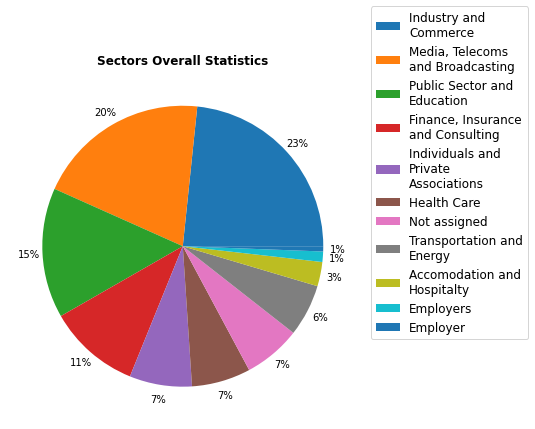

In [20]:
# Retrieving Sectors Overall Statistics
sector_data=pd.DataFrame(dataFrame['Sector'].value_counts())
sector_data=sector_data.reset_index()
sector_data.columns=['Sector', 'Counts']
print(sector_data)

# Exporting Sectors Overall Statistics Plot
sector_data['Sector']= sector_data['Sector'].str.wrap(18)
sector_data.plot(figsize=(9,6), y='Counts', kind='pie', labels=None, autopct='%1.0f%%', pctdistance=1.1)
plt.legend(labels=sector_data['Sector'], fontsize='large', loc="upper right", bbox_to_anchor=(1.5, 1.2), ncol=1)
plt.ylabel('')
plt.xlabel('')
plt.title('Sectors Overall Statistics', fontsize='large', fontweight='bold')
plt.tight_layout()
plt.savefig("../report_build/graphs/sector_data.jpeg")

### Sum of fines per sector

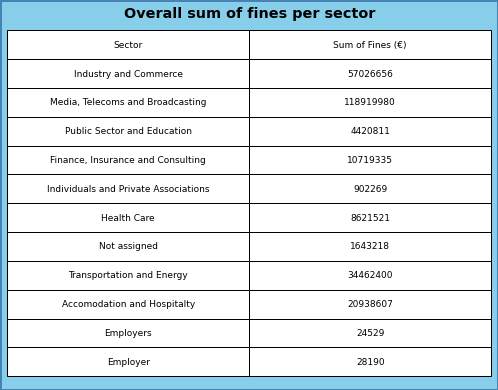

In [21]:
# Finding Top 10 Quoted Articles / Sum of fines
sector_data=pd.DataFrame(dataFrame['Sector'].value_counts())
sector_data=sector_data.reset_index()
sector_data.columns=['Sector', 'Counts']
sec_sum_fine=[]

for sec in sector_data['Sector']:
    ex=dataFrame.loc[dataFrame['Sector']==sec,:]
    ex=ex.reset_index()
    ex=ex[["Fine"]]
    ex.columns=['Fine']

    ind=0
    for fine in ex['Fine']:
        if(fine=="Unknown"):
            ex = ex.drop(ind, axis=0)
        ind=ind+1
    sumfine=0
    for fine in ex['Fine']:
        fine=int(str(fine).replace(',',''))
        sumfine=sumfine+fine
    ex.reset_index()
    sec_sum_fine.append(sumfine)

sumoffines_per_sec={'Sector': sector_data["Sector"], 'Sum of Fines': sec_sum_fine}
sumoffines_per_sec=pd.DataFrame(sumoffines_per_sec)
sumoffines_per_sec.reset_index()
sumoffines_per_sec.columns=['Sector', 'Sum of Fines (€)']

# Exporting Sectors Overall Statistics Plot

# Plot a background
plt.figure(linewidth=3,
           edgecolor='steelblue',
           facecolor='skyblue',
           tight_layout={'pad':1},
           figsize=(7,len(sumoffines_per_sec)/2)
          )
    
# Plot table
the_table=plt.table(sumoffines_per_sec.values,colLabels=sumoffines_per_sec.columns, loc='center',rowLoc='center',cellLoc ='center')
the_table.scale(1, 2)

# Hide axes & Prepare graph
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)

# Add title
plt.title('Overall sum of fines per sector',y=1, fontsize= 'x-large', fontweight='bold')

# Add footer
#plt.figtext(0.95, 0.02, datetime.datetime.now(), horizontalalignment='right', size=8, weight='light')

plt.savefig("../report_build/graphs/sector_fines_data.jpeg")

### Top 5 Controller per number of fines

                                          Controller  Counts
0                            Vodafone España, S.A.U.      26
1                                 Xfera Moviles S.A.      14
2                                               Bank       5
3                     Telefónica Móviles España, SAU       4
4                                 Iberdrola Clientes       4
5                                     Police Officer       3
6                                             Doctor       3
7  LGS Handling Ltd, Louis Travel Ltd, and Louis ...       3
8                             Homeowners Association       3
9                               Vodafone España, SAU       3


<ipython-input-6-98697f80776f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_controller['Controller']= top10_controller['Controller'].str.wrap(10)


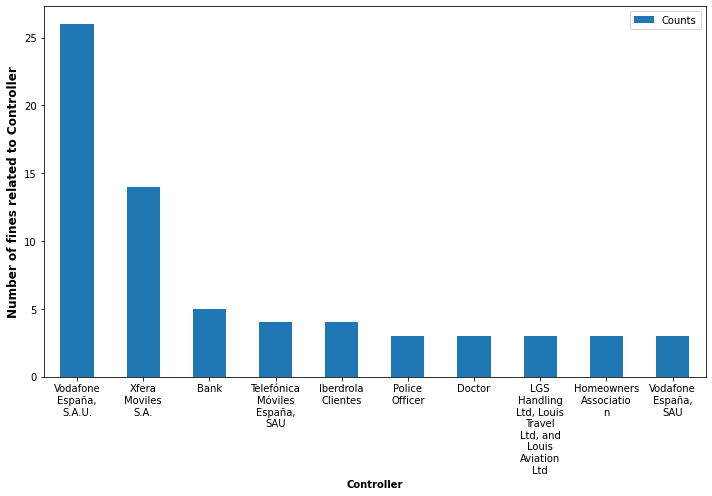

In [6]:
# Finding Top 10 Controller / Number of fines
controller_data=pd.DataFrame(dataFrame['Controller'].value_counts())
controller_data=controller_data.reset_index()
controller_data.columns=['Controller', 'Counts']
controller_data=controller_data.drop(index=controller_data[controller_data['Controller']=="Unknown"].index)
controller_data=controller_data.drop(index=controller_data[controller_data['Controller']=="Unknown Company"].index)
controller_data=controller_data.drop(index=controller_data[controller_data['Controller']=="Private Individual"].index)
controller_data=controller_data.drop(index=controller_data[controller_data['Controller']=="Private person"].index)
controller_data=controller_data.drop(index=controller_data[controller_data['Controller']=="Private Person"].index)
controller_data=controller_data.drop(index=controller_data[controller_data['Controller']=="Employer"].index)
controller_data=controller_data.reset_index().drop(columns ='index')
top10_controller=controller_data.head(10)
print(top10_controller)

# Exporting the Top 10 Controller
top10_controller['Controller']= top10_controller['Controller'].str.wrap(10)
top10_controller.plot(figsize=(10,7), x='Controller', y='Counts', kind='bar', rot=0)
plt.xlabel('Controller', fontsize='medium', fontweight='bold')
plt.ylabel('Number of fines related to Controller', fontsize='large', fontweight='bold')
plt.tight_layout();
plt.savefig("../report_build/graphs/top10_controller.jpeg")

### Top 10 Controllers per sum of fines

                                         Controller  Sum of Fines
266                                     Google Inc.      50000000
322  H&M Hennes & Mauritz Online Shop A.B. & Co. KG      35258708
181               TIM (telecommunications operator)      27800000
64                                  British Airways      22046000
188                     Marriott International, Inc      20450000
225                                 Wind Tre S.p.A.      16700000
29                               Deutsche Wohnen SE      14500000
251                          Vodafone Italia S.p.A.      12251601
18                                   Eni Gas e Luce      11500000
38            Banco Bilbao Vizcaya Argentaria, S.A.       5036000


<ipython-input-23-8d634626c2d2>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_sumoffines_per_controller['Controller']= top10_sumoffines_per_controller['Controller'].str.wrap(10)


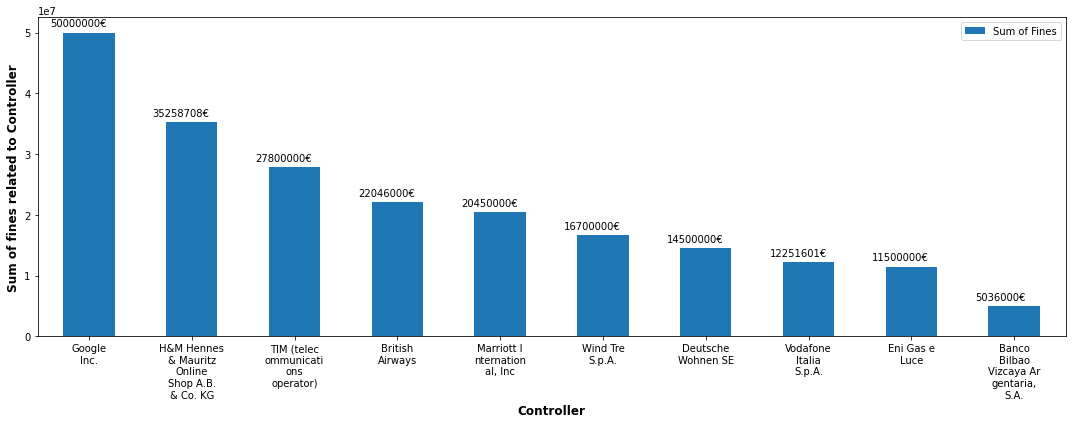

In [23]:
# Finding Top 10 Controller / Sum of fines
controller_per_fine=pd.DataFrame(columns=['Controller', 'Sum of fines'])
controller_sum_fine=[]
for controller in controller_data['Controller']:
    ex=dataFrame.loc[dataFrame['Controller']==controller,:]
    ex=ex.reset_index()
    ex=ex[["Fine"]]
    ex.columns=['Fine']

    ind=0
    for fine in ex['Fine']:
        if(fine=="Unknown"):
            ex = ex.drop(ind, axis=0)
        ind=ind+1
    sumfine=0
    for fine in ex['Fine']:
        fine=int(str(fine).replace(',',''))
        sumfine=sumfine+fine
    ex.reset_index()
    controller_sum_fine.append(sumfine)


sumoffines_per_controller={'Controller': controller_data["Controller"], 'Sum of Fines': controller_sum_fine}
sumoffines_per_controller=pd.DataFrame(sumoffines_per_controller)
sumoffines_per_controller.reset_index()
sumoffines_per_controller.columns=['Controller', 'Sum of Fines']

# Exporting the Top 10 Controller / Sum of fines
sumoffines_per_controller=sumoffines_per_controller.sort_values("Sum of Fines", ascending=False)
top10_sumoffines_per_controller=sumoffines_per_controller.head(10)
print(top10_sumoffines_per_controller)
top10_sumoffines_per_controller['Controller']= top10_sumoffines_per_controller['Controller'].str.wrap(10)
ax=top10_sumoffines_per_controller.plot(figsize=(15,6), x='Controller', y='Sum of Fines', kind='bar', rot=0)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-0.13, i.get_height()+1000000, 
            str(round((i.get_height()), 2))+"€", fontsize=10)
plt.xlabel('Controller', fontsize='large', fontweight='bold')
plt.ylabel('Sum of fines related to Controller', fontsize='large', fontweight='bold')
plt.tight_layout();
plt.savefig("../report_build/graphs/top10_controller_fines.jpeg")